# Predicting Liquor Sales Profit and post-Pandemic Business Analytics

# Exploratory Data Analysis

### Identified Business Problems

As presented in the previous notebook and in the Project proposal, we are using a large dataset to help stakeholders make data-driven business decisions. We identified a few avenues for explorations. 

In this EDA notebook, apart from our general Exploratory FEature Analysis(univariate, bivariate, multivariate) we will also answer 2 Business Problems:

1. We will conduct Exploratory Data Analysis on what was **the impact of Covid-19 on the Alcoholic Beverages Industry**. We will take into consideration the demographic trends and Income per capita, but we will also make our recommendations and analysis considering the “regression to the mean” statistical principle.

2. We will also conduct **Storage Capacity** exploratory analysis with the purpose of predicting how the storage needs will change within one year from the current date.

Later, in our next Notebook we will approach another Business problems that concerns the Alcoholic Beverages Division of Iowa:

3. Cohort Analysis and **Customer Segmentation using RFM(Recency, Frequency and Monetary value) and Unsupervised Learning** in oru Pre-Processing section.

Finally, in our Modeling Part, we will focus on driving Business Insight to help a hypothetical liquor store owner make strategic decisions:

4. We want to assist him in **expanding to new locations** throughout the state.
5. Lastly, we want to use existing data for a **time series analysis and predictions to forecast sales for next month**.

### EDA setup

In the Data Wrangling part of this project we used our initial data and because of the large size we divided our initial data in several subset. Each of them to be used for specific Business problems. These are the datasets created:
* pandemicEDA
* storageEDA
* cust_segmentation
* pick_new_location
* predict_sales
* df - this is the original data, cleaned of missing data, ouliers and checked for consistency

We have this plan to conduct EDA:

   1. Conduct univariate EDA on our data
   2. Conduct bivariate EDA on variables with our target feature
   3. Multivariate EDA
   4. conduct Analysis of how Covid-19 impacted the Spirits Industry in Iowa
   5. conduct Analysis on volume of alcoholic beverages sold within difeerent time periods: weekly, monthly and on a three months period to identify storage needs and trends.

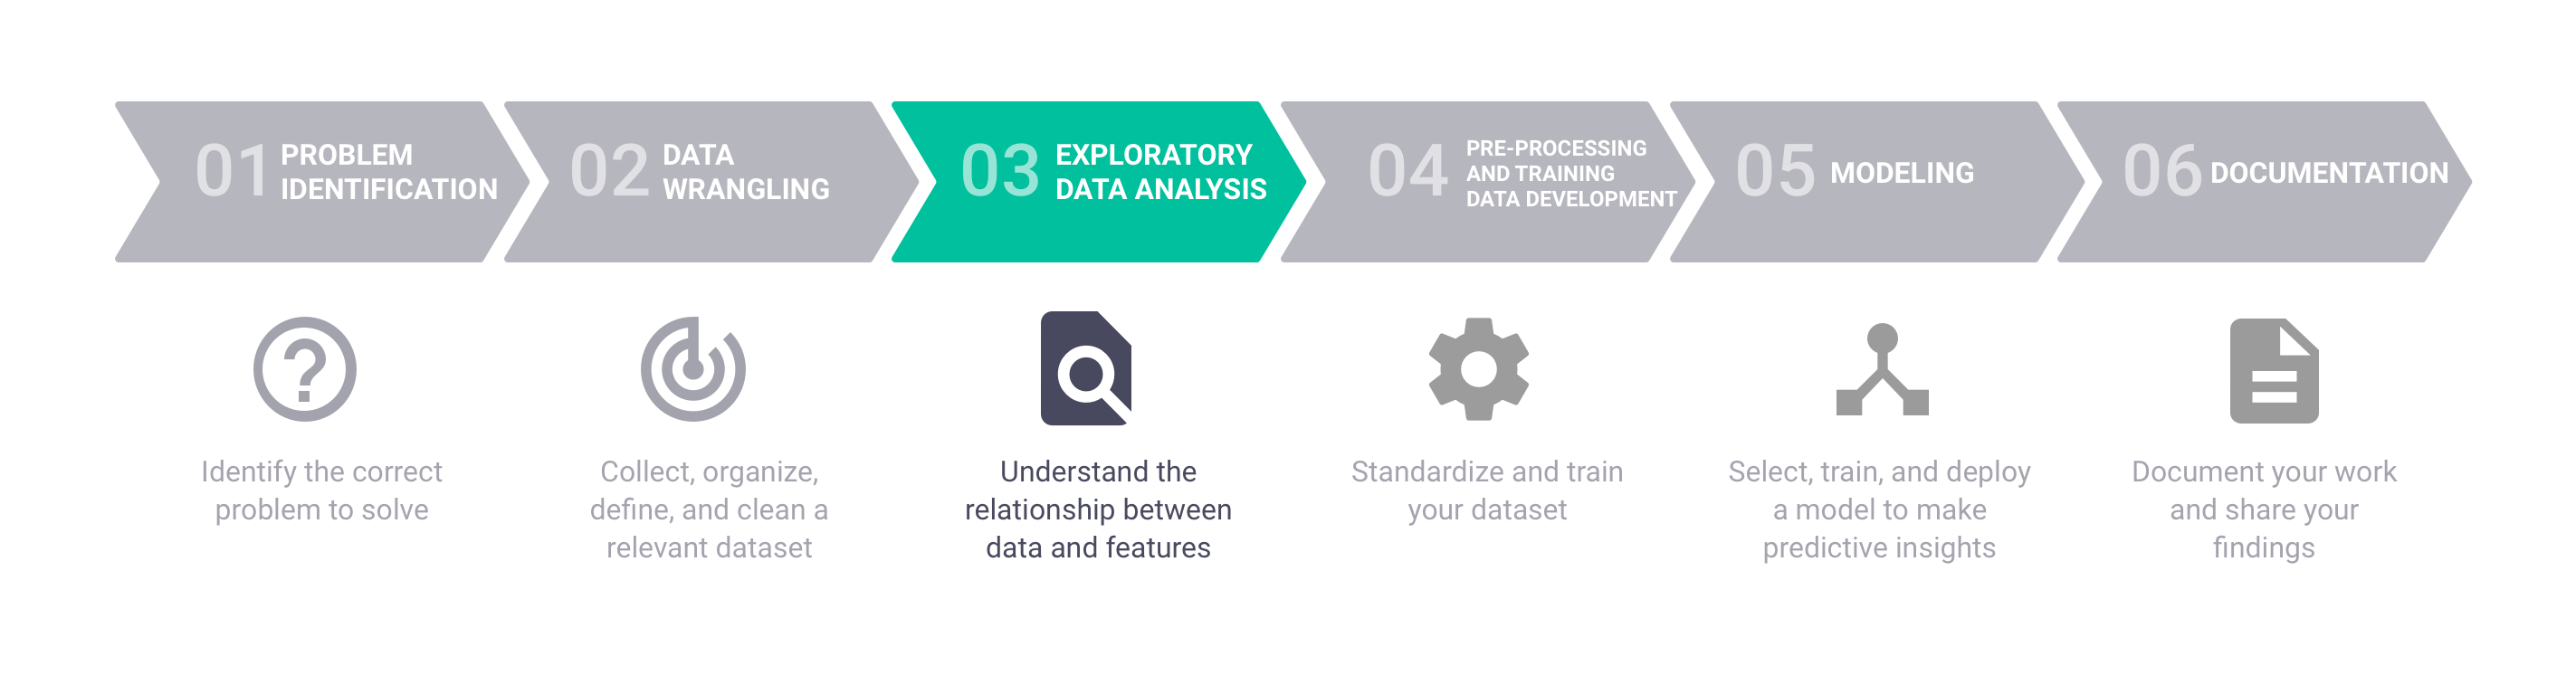

In [41]:
import dask.dataframe as dd
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 6)
import seaborn as sns
sns.set_theme(style="whitegrid")

import pandas.plotting
from IPython import display
from ipywidgets import interact, widgets

## 1. Features Analysis

In [2]:
df = pd.read_csv('../data/interim/cleaned_data.csv', parse_dates = True, low_memory=False)


In [3]:
df.head().T

,0,1,2,3,4
Unnamed: 0,2414117,2414484,2414605,2414652,2415000
Invoice/Item Number,S31418300050,S31418300056,S31418300004,S31298500073,S31418300032
Date,2016-03-24,2016-03-24,2016-03-24,2016-03-17,2016-03-24
Address,2217 COLLEGE,2217 COLLEGE,2217 COLLEGE,2217 COLLEGE,2217 COLLEGE
City,CEDAR FALLS,CEDAR FALLS,CEDAR FALLS,CEDAR FALLS,CEDAR FALLS
Zip Code,50613,50613,50613,50613,50613
Store Location,POINT (-92.455796 42.517182),POINT (-92.455796 42.517182),POINT (-92.455796 42.517182),POINT (-92.455796 42.517182),POINT (-92.455796 42.517182)
County,black hawk,black hawk,black hawk,black hawk,black hawk
Category,1.0829e+06,1.08139e+06,1.0121e+06,1.0221e+06,1.03108e+06
Category Name,MISC. IMPORTED CORDIALS & LIQUEURS,IMPORTED SCHNAPPS,CANADIAN WHISKIES,TEQUILA,VODKA 80 PROOF


We will drop the features that are not necessary for our EDA.

In [4]:
df = df.drop(['Unnamed: 0','Invoice/Item Number','Address','Category','Item Number'], axis = 1)
df.head().T

,0,1,2,3,4
Date,2016-03-24,2016-03-24,2016-03-24,2016-03-17,2016-03-24
City,CEDAR FALLS,CEDAR FALLS,CEDAR FALLS,CEDAR FALLS,CEDAR FALLS
Zip Code,50613,50613,50613,50613,50613
Store Location,POINT (-92.455796 42.517182),POINT (-92.455796 42.517182),POINT (-92.455796 42.517182),POINT (-92.455796 42.517182),POINT (-92.455796 42.517182)
County,black hawk,black hawk,black hawk,black hawk,black hawk
Category Name,MISC. IMPORTED CORDIALS & LIQUEURS,IMPORTED SCHNAPPS,CANADIAN WHISKIES,TEQUILA,VODKA 80 PROOF
Vendor Name,Diageo Americas,"Sazerac Co., Inc.","Constellation Wine Company, Inc.",Proximo,Sazerac North America
Item Description,Romana Sambuca Italian Liquore,Dr. Mcgillicuddy's Mentholmint,Black Velvet,Jose Cuervo Especial Reposado Tequila,Skol Vodka
Pack,12,12,12,12,12
Bottle Volume (ml),750,750,1000,1000,1000


Lastly, during our preliminary EDA we discovered that some cities are in lower case, while other in upper case. To avoind having the same issue with the remaining data we will transform every object feature from our dataFrame into lowercase.

In [5]:
for columns in ['City', 'Store Location', 'County', 'Category Name', 'Vendor Name', 'Item Description', 'Store Name']:
    df[columns] = df[columns].str.lower()

In [6]:
# Inspect categorical columns
df.describe(exclude=[np.number], datetime_is_numeric=True).T

,count,unique,top,freq
Date,21641145,2345,2020-12-22,18002
City,21641145,459,des moines,1873606
Store Location,21641145,2067,point (-91.53046300000001 41.642764),195881
County,21641145,99,polk,3976377
Category Name,21641145,112,canadian whiskies,2090073
Vendor Name,21641145,491,diageo americas,3631610
Item Description,21641145,9353,black velvet,556925
Store Name,21641145,2495,hy-vee #3 / bdi / des moines,181797


In [7]:
# Inspect numerical columns
df.describe(include=[np.number]).T

,count,mean,std,min,25%,50%,75%,max
Zip Code,21641145.0,51265.021904,989.089753,50002.00,50316.00,51101.00,52303.00,57222.00
Pack,21641145.0,12.256196,7.693593,1.00,6.00,12.00,12.00,336.00
Bottle Volume (ml),21641145.0,904.075270,653.411025,0.00,750.00,750.00,1000.00,378000.00
State Bottle Cost,21641145.0,10.042841,10.735992,0.00,5.50,8.25,12.34,7680.00
State Bottle Retail,21641145.0,15.077664,16.103339,0.00,8.25,12.38,18.60,11520.00
Bottles Sold,21641145.0,10.442350,28.283905,0.00,3.00,6.00,12.00,15000.00
Sale (Dollars),21641145.0,136.985590,470.601327,0.00,32.28,72.00,141.72,279557.28
Volume Sold (Gallons),21641145.0,2.413350,8.962290,0.00,0.40,1.27,2.77,3962.58
state_profit,21641145.0,45.778322,157.291485,-2901.96,10.80,24.00,47.45,93225.60


In [8]:
df[['Date']] = df[['Date']].apply(pd.to_datetime)
df.dtypes

Date                     datetime64[ns]
City                             object
Zip Code                          int64
Store Location                   object
County                           object
Category Name                    object
Vendor Name                      object
Item Description                 object
Pack                            float64
Bottle Volume (ml)              float64
State Bottle Cost               float64
State Bottle Retail             float64
Bottles Sold                    float64
Sale (Dollars)                  float64
Volume Sold (Gallons)           float64
Store Name                       object
state_profit                    float64
dtype: object

#### City

In [9]:
subset = df.groupby('City').agg({'state_profit':'sum', 'Volume Sold (Gallons)':'sum'})
subset

,state_profit,Volume Sold (Gallons)
City,,
ackley,212617.23,14312.90
adair,166419.36,8352.21
adel,1361564.75,77186.69
afton,119259.25,7088.46
akron,123841.61,7621.23
...,...,...
winthrop,228985.34,13106.88
woodbine,253378.64,15280.97
woodward,102781.09,5704.17


We can see that there are the same cities in different formats

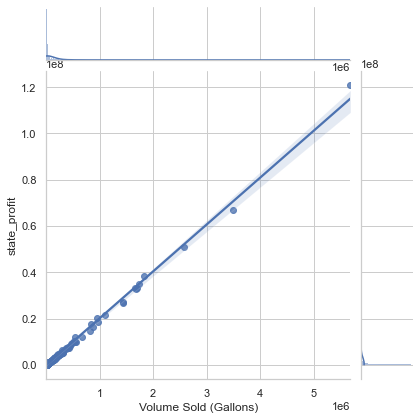

In [10]:
sns.jointplot(data = subset, x = 'Volume Sold (Gallons)', y = 'state_profit', kind = 'reg')

As expected, the volume sold is dirrectly correlated with the state profit. but we can see that while most cities are averaging up to 10,000,000 Gallons, there are a few that are buying up to 70M Gallons.

Let's explore the biggest buyers

In [11]:
top_20 = subset.sort_values('Volume Sold (Gallons)', ascending = False).head(20).round()
top_20


,state_profit,Volume Sold (Gallons)
City,,
des moines,121044719.0,5688560.0
cedar rapids,66682806.0,3491570.0
davenport,50736455.0,2575573.0
west des moines,38202360.0,1832668.0
waterloo,34991989.0,1744894.0
council bluffs,33149700.0,1697181.0
sioux city,32741190.0,1674534.0
iowa city,33094419.0,1667914.0
ames,26869123.0,1429015.0


In [12]:
top_20 = top_20.reset_index()

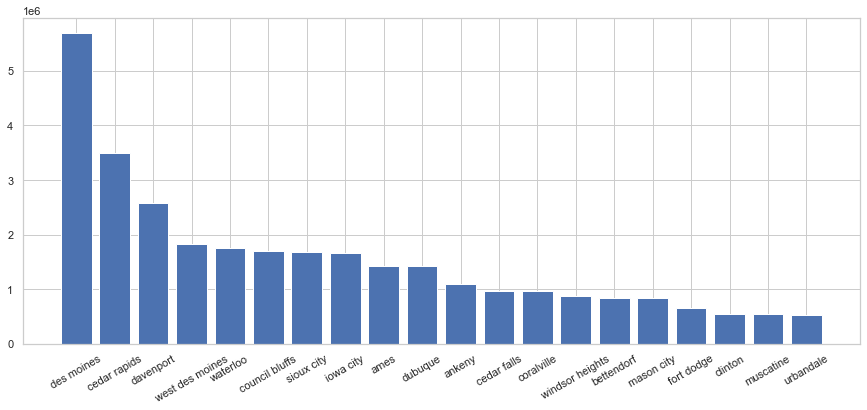

In [13]:
plt.bar(height = top_20['Volume Sold (Gallons)'], x = top_20.City)
plt.xticks(rotation = 30)
plt.show()

### County

We will import some new data for this EDA, more precisely the **annual personal income per county** from [Iowa.Gov](https://data.iowa.gov/Economic-Statistics/Annual-Personal-Income-for-State-of-Iowa-by-County/st2k-2ti2/data). 

In [14]:
income = pd.read_csv('../data/raw/Annual_Personal_Income_for_State_of_Iowa_by_County.csv')
income.head()

,Row ID,Geography ID,Name,Variable Code,Variable,Value,Variable Unit,Date,Location
0,19001_2019_CAINC1-3_annual,19001,"Adair, IA",CAINC1-3,Per capita personal income,55251,Dollars,12/31/2019,POINT (-94.478164 41.328528)
1,19003_2019_CAINC1-3_annual,19003,"Adams, IA",CAINC1-3,Per capita personal income,66683,Dollars,12/31/2019,POINT (-94.696906 41.021656)
2,19005_2019_CAINC1-3_annual,19005,"Allamakee, IA",CAINC1-3,Per capita personal income,49945,Dollars,12/31/2019,POINT (-91.382751 43.274964)
3,19007_2019_CAINC1-3_annual,19007,"Appanoose, IA",CAINC1-3,Per capita personal income,40000,Dollars,12/31/2019,POINT (-92.873061 40.744296)
4,19009_2019_CAINC1-3_annual,19009,"Audubon, IA",CAINC1-3,Per capita personal income,58359,Dollars,12/31/2019,POINT (-94.904312 41.679178)


In [15]:
income['County'] = income['Name'].str[:-4]
income['County'] = income['County'].str.lower()
income.head()

,Row ID,Geography ID,Name,Variable Code,Variable,Value,Variable Unit,Date,Location,County
0,19001_2019_CAINC1-3_annual,19001,"Adair, IA",CAINC1-3,Per capita personal income,55251,Dollars,12/31/2019,POINT (-94.478164 41.328528),adair
1,19003_2019_CAINC1-3_annual,19003,"Adams, IA",CAINC1-3,Per capita personal income,66683,Dollars,12/31/2019,POINT (-94.696906 41.021656),adams
2,19005_2019_CAINC1-3_annual,19005,"Allamakee, IA",CAINC1-3,Per capita personal income,49945,Dollars,12/31/2019,POINT (-91.382751 43.274964),allamakee
3,19007_2019_CAINC1-3_annual,19007,"Appanoose, IA",CAINC1-3,Per capita personal income,40000,Dollars,12/31/2019,POINT (-92.873061 40.744296),appanoose
4,19009_2019_CAINC1-3_annual,19009,"Audubon, IA",CAINC1-3,Per capita personal income,58359,Dollars,12/31/2019,POINT (-94.904312 41.679178),audubon


In [16]:
income = income[['County', 'Value']]
income

,County,Value
0,adair,55251
1,adams,66683
2,allamakee,49945
3,appanoose,40000
4,audubon,58359
...,...,...
94,winnebago,45793
95,winneshiek,51904
96,woodbury,45132
97,worth,44675


In [17]:
income.dtypes

County    object
Value      int64
dtype: object

Now let's see if the volume bouth per county is correlated with the income per capita.

In [18]:
subset = df.groupby('County').agg({'Volume Sold (Gallons)':'sum', 'State Bottle Retail':'mean'}).round(1)
subset

,Volume Sold (Gallons),State Bottle Retail
County,,
adair,82543.2,13.8
adams,19204.2,15.8
allamakee,173774.1,15.1
appanoose,160313.3,14.9
audubon,37928.6,13.6
...,...,...
winnebago,155597.9,15.1
winneshiek,256839.4,16.1
woodbury,1751674.2,15.1


In [19]:
subset = subset.reset_index()

subset = subset.merge(income, on = 'County')
subset

,County,Volume Sold (Gallons),State Bottle Retail,Value
0,adair,82543.2,13.8,55251
1,adams,19204.2,15.8,66683
2,allamakee,173774.1,15.1,49945
3,appanoose,160313.3,14.9,40000
4,audubon,37928.6,13.6,58359
...,...,...,...,...
94,winnebago,155597.9,15.1,45793
95,winneshiek,256839.4,16.1,51904
96,woodbury,1751674.2,15.1,45132
97,worth,54635.1,14.5,44675


In [20]:
subset.columns = ['County','Volume', 'Avg_price_per_bottle', 'Avg_income']

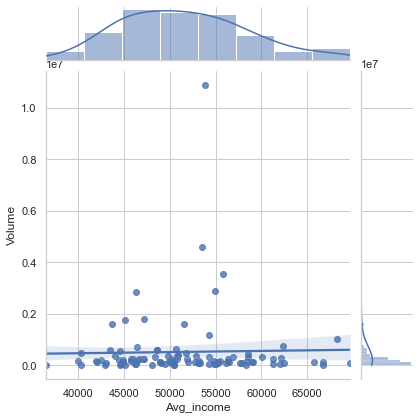

In [21]:
sns.jointplot(data = subset, y = 'Volume', x = 'Avg_income', kind = 'reg')

We can see that there are no correlation between how rich are the residents of a county and how much Volume of Spirits was sold in that county.

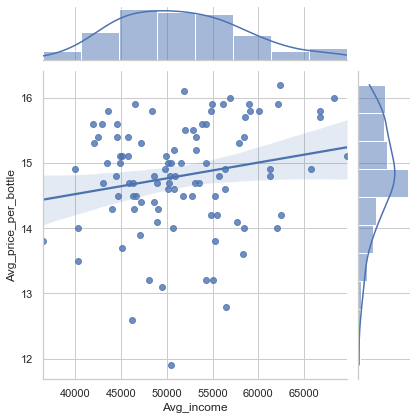

In [22]:
sns.jointplot(data = subset, y = 'Avg_price_per_bottle', x = 'Avg_income', kind = 'reg')

We can see that there is a slight correlation between how wealthy are the residents of a county and the average bottle cost sold in that county.

### Category

In [23]:
subset = df.groupby('Category Name').agg({'State Bottle Retail':'mean', 'Sale (Dollars)':'sum', 'state_profit': 'sum', 'Volume Sold (Gallons)':'sum'}).round(1)

In [24]:
subset.columns = ['Avg_bottle_price', 'total_sales', 'state_profit', 'Volume']
subset = subset.reset_index()
subset

,Category Name,Avg_bottle_price,total_sales,state_profit,Volume
0,100 proof vodka,8.8,7305335.8,2437842.0,253327.4
1,100% agave tequila,28.2,65626061.3,21920287.9,483318.4
2,aged dark rum,19.4,3479460.1,1167293.8,42548.1
3,amaretto - imported,46.7,70470.3,23495.1,299.2
4,american alcohol,13.0,2966946.8,989358.0,45374.3
...,...,...,...,...,...
107,watermelon schnapps,10.5,1705878.7,570297.1,38918.2
108,whiskey liqueur,17.7,146301755.0,48739328.0,2165677.6
109,white creme de cacao,6.8,241671.9,80557.1,6991.4
110,white creme de menthe,7.0,73888.7,24625.1,2097.9


Let's see what are the most expensive and the msot cheap spirits categories

In [25]:
subset = subset.sort_values('Avg_bottle_price', ascending = False)

In [26]:
top15 = subset.head(15)
bottom15 = subset.tail(15)

In [27]:
subs = top15.append(bottom15)
subs

,Category Name,Avg_bottle_price,total_sales,state_profit,Volume
47,high proof beer - american,122.1,6237.8,1698.7,10.8
64,imported whiskies,85.4,3586.7,1195.6,8.3
69,japanese whisky,56.4,90508.8,30174.5,347.3
91,single malt scotch,47.2,31294070.1,10476490.3,146850.7
3,amaretto - imported,46.7,70470.3,23495.1,299.2
66,iowa distillery whiskies,40.9,341602.0,112979.8,1968.2
54,imported distilled spirits specialty,35.7,37371.5,12353.6,195.4
65,iowa distilleries,34.2,557729.3,185112.8,3207.9
99,temporary & specialty packages,34.1,3243973.0,1081412.8,31887.9
90,single barrel bourbon whiskies,32.5,3868914.6,1289565.6,24846.5


<AxesSubplot:xlabel='Avg_bottle_price', ylabel='Category Name'>

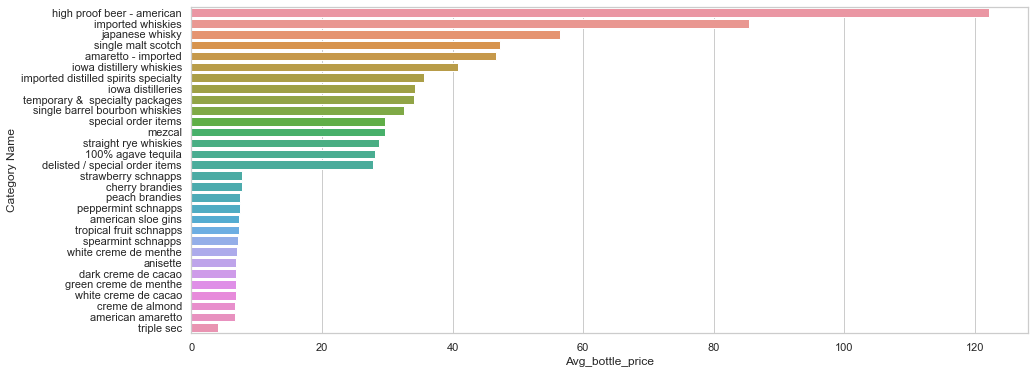

In [28]:
subs = subs.sort_values('Avg_bottle_price', ascending = False)
sns.barplot(data = subs, y = 'Category Name', x = 'Avg_bottle_price')

We can see that the High Proof Beer - American is the most expensive one with an average of over 
$120 per bottle, folowed by imported Wiskey and Japanese Wiskey. The least expensive one is the Triple Sec.

<AxesSubplot:xlabel='Volume', ylabel='Category Name'>

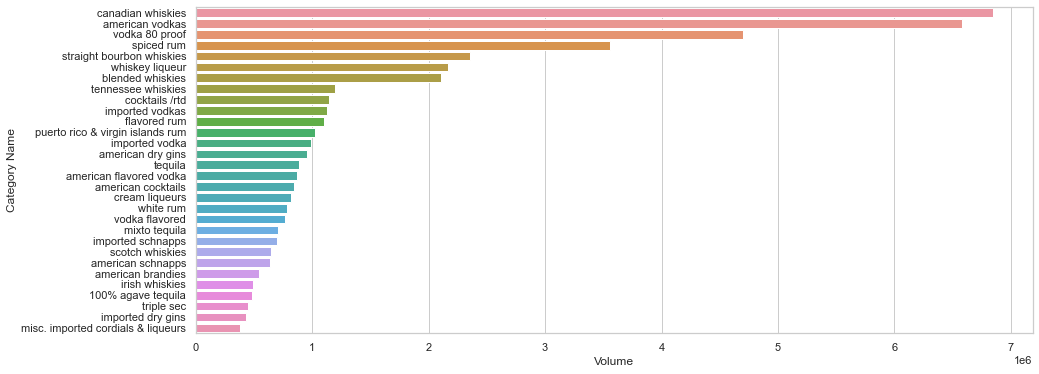

In [29]:
subset = subset.sort_values('Volume', ascending = False)
subs = subset.head(30)
sns.barplot(data = subs, y = 'Category Name', x = 'Volume')

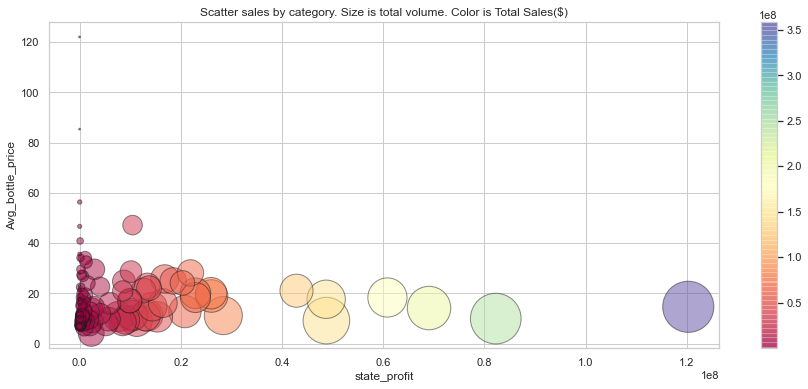

In [30]:
area = subset.Volume**(1/2)
color = subset.total_sales

subset.plot.scatter(x ='state_profit', y ='Avg_bottle_price' ,
                     c = color, colormap=matplotlib.cm.get_cmap('Spectral'),
                     s = area, edgecolors = 'k',
                     sharex=False, figsize = (15,6), alpha = 0.5)
plt.title('Scatter sales by category. Size is total volume. Color is Total Sales($)')
# plt.xscale('log')
plt.show()

We can see here that the main purpose of the Department is to sell as much, and with it, the more profit they will make. All the top 6 categories that are bringing the most profit are below $20 per bottle.

### Item Description EDA

In [ ]:
subset = df.groupby('Item Description').agg({'State Bottle Retail':'mean', 'Sale (Dollars)':'sum',
                                             'state_profit': 'sum', 'Volume Sold (Gallons)':'sum'}).round(1)

In [ ]:
subset.columns = ['Avg_bottle_price', 'total_sales', 'state_profit', 'Volume']
subset = subset.reset_index()
subset

Let's see the most expensive 30 beverages

In [ ]:
subset = subset.sort_values('Avg_bottle_price', ascending = False)
top30 = subset.head(30)
top30

In [ ]:
sns.barplot(data = subs, y = 'Category Name', x = 'Avg_bottle_price')

And the most popular 30 beverages

In [ ]:
subset = subset.sort_values('Volume', ascending = False)
top30 = subset.head(30)
top30

In [ ]:
sns.barplot(data = subs, y = 'Category Name', x = 'Volume')

Finally let's explore the relation between Average price per bottle, Sales, state profit and Volume sold when it comes to the 100 most sold items.

In [ ]:
subset = subset.sort_values('Volume', ascending = False)
top100 = subset.head(100)

area = subset.Volume**(1/2)
color = subset.total_sales

subset.plot.scatter(x ='state_profit', y ='Avg_bottle_price' ,
                     c = color, colormap=matplotlib.cm.get_cmap('Spectral'),
                     s = area, edgecolors = 'k',
                     sharex=False, figsize = (15,6), alpha = 0.5)
plt.title('Scatter sales by Product Name. Size is total volume. Color is Total Sales($)')
# plt.xscale('log')
plt.show()

In [ ]:
x = asr

### Heatmap

<AxesSubplot:>

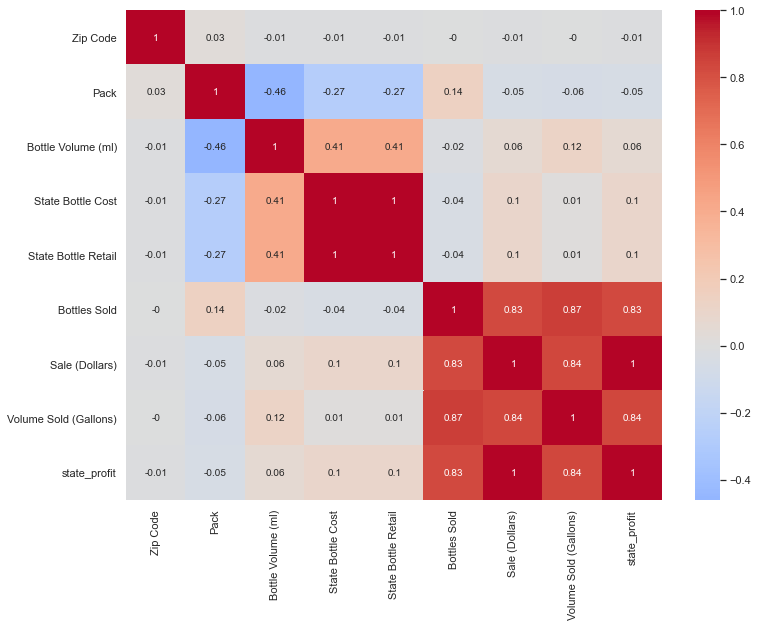

In [31]:
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(round(df.corr(), 2), center = 0, cmap="coolwarm", annot = True, annot_kws={'size': 10})

As espected we see that State Bottle cost and Retail price are strongly correlated, similarly to Sale($) and state_profit.
Other high correlations are:
 * Negative correlation of -0.46 between pack size and bottle Volume: the bigger the volume, the less bottles in a pack.
 * Negative correlation of -0.27 between pack size and bottle Cost: the bigger the pack, the less bottles cost.
 * Positive correlation of 0.41 between bottle Volume and bottle Cost: the bigger the Bottle, the the more it will cost.
 * Finnaly, strong positive correlations (over 0.83) between Bottles Sold, Sale, Volume Sold and State Profit.

## The impact of Covid-19 on the Alcoholic Beverages Industry

In [32]:
df = pd.read_csv('../data/interim/pandemicEDA_df.csv')

In [33]:
df

,Unnamed: 0,Date,Store Name,City,County,Vendor Name,Category Name,Item Description,Sale (Dollars),Volume Sold (Gallons),state_profit
0,2414117,2016-03-24,Hillstreet News and Tobacco,CEDAR FALLS,black hawk,Diageo Americas,MISC. IMPORTED CORDIALS & LIQUEURS,Romana Sambuca Italian Liquore,243.00,2.38,81.00
1,2414484,2016-03-24,Hillstreet News and Tobacco,CEDAR FALLS,black hawk,"Sazerac Co., Inc.",IMPORTED SCHNAPPS,Dr. Mcgillicuddy's Mentholmint,156.12,2.38,52.08
2,2414605,2016-03-24,Hillstreet News and Tobacco,CEDAR FALLS,black hawk,"Constellation Wine Company, Inc.",CANADIAN WHISKIES,Black Velvet,477.60,12.68,159.36
3,2414652,2016-03-17,Hillstreet News and Tobacco,CEDAR FALLS,black hawk,Proximo,TEQUILA,Jose Cuervo Especial Reposado Tequila,450.00,6.34,150.00
4,2415000,2016-03-24,Hillstreet News and Tobacco,CEDAR FALLS,black hawk,Sazerac North America,VODKA 80 PROOF,Skol Vodka,79.56,3.17,26.52
...,...,...,...,...,...,...,...,...,...,...,...
21641140,4647896,2017-11-17,"Cats Eye Distillery, LLC",Bettendorf,scott,Cats Eye Distillery,Corn Whiskies,Essence of Iowa Whiskey,346.56,0.19,9.63
21641141,4622234,2018-05-23,"Green Frog Distillery, LLC",Keokuk,lee,"Green Frog Distillery, LLC",Corn Whiskies,Green Frog Distillery Straight Corn Whiskey,157.50,0.39,17.50
21641142,4610127,2018-07-26,Templeton Distilling LLC,Templeton,carroll,Templeton Distilling LLC,Blended Whiskies,Templeton Rye Special Reserve 8YR,246.72,9.70,671.79
21641143,2275966,2020-10-15,Rock River Distillation Company,Rock Rapids,lyon,Rocky Top Investments / Rock River Distillation,Temporary & Specialty Packages,Revenant Rye,1620.00,7.13,540.00


We will drop the first unnecesary column that originates from the former index.

In [34]:
df = df.iloc[: , 1:]

In [38]:
for columns in ['City', 'County', 'Category Name', 'Vendor Name', 'Item Description', 'Store Name']:
    df[columns] = df[columns].str.lower()

In [39]:
# Inspect categorical columns
df.describe(exclude=[np.number]).T

,count,unique,top,freq
Date,21641145,2345,2020-12-22,18002
Store Name,21641145,2495,hy-vee #3 / bdi / des moines,181797
City,21641145,459,des moines,1873606
County,21641145,99,polk,3976377
Vendor Name,21641145,491,diageo americas,3631610
Category Name,21641145,112,canadian whiskies,2090073
Item Description,21641145,9353,black velvet,556925


In [40]:

# Inspect numerical columns
df.describe(include=[np.number]).T

,count,mean,std,min,25%,50%,75%,max
Sale (Dollars),21641145.0,136.985590,470.601327,0.00,32.28,72.00,141.72,279557.28
Volume Sold (Gallons),21641145.0,2.413350,8.962290,0.00,0.40,1.27,2.77,3962.58
state_profit,21641145.0,45.778322,157.291485,-2901.96,10.80,24.00,47.45,93225.60


To explore the covid impact on the Alcoholic industry in Iowa we have the folowing directions that we want to analyze:
* a scatter plot to show the evolution of sales, volume sold and state profit per County. We will also use a Tableau Dashboard to better visualize the Counties.
* a time series that shows the same 3 variables trends

### Scatter Plots and Dashboards

We will first plot by **Quarter with the existing data** and then we will plot **by year with added data from Income per capita**.

In [64]:
subset = df[['Date', 'County', 'Sale (Dollars)', 'Volume Sold (Gallons)', 'state_profit']]

In [65]:
subset.loc[:,'Date'] = subset.loc[:,'Date'].apply(pd.to_datetime)

E:\Anaconda\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [66]:
subset = subset.set_index('Date')
subset

,County,Sale (Dollars),Volume Sold (Gallons),state_profit
Date,,,,
2016-03-24,black hawk,243.00,2.38,81.00
2016-03-24,black hawk,156.12,2.38,52.08
2016-03-24,black hawk,477.60,12.68,159.36
2016-03-17,black hawk,450.00,6.34,150.00
2016-03-24,black hawk,79.56,3.17,26.52
...,...,...,...,...
2017-11-17,scott,346.56,0.19,9.63
2018-05-23,lee,157.50,0.39,17.50
2018-07-26,carroll,246.72,9.70,671.79


In [67]:
subset.columns = ['County', 'Sale', 'Volume', 'state_profit']

In [114]:
grouper = subset.groupby('County').resample('Q').sum()
grouper

Sale   Volume  state_profit
County Date                                        
adair  2012-03-31   78426.57  1830.92      26327.85
       2012-06-30  110003.28  2356.82      36956.82
       2012-09-30  101681.95  2150.68      34084.64
       2012-12-31  123579.68  2454.28      41607.74
       2013-03-31   82411.70  1786.17      27579.63
...                      ...      ...           ...
wright 2020-06-30  263194.43  5103.59      87856.80
       2020-09-30  233584.51  4358.62      77750.01
       2020-12-31  221124.60  4054.50      73915.42
       2021-03-31  231320.48  4155.41      77288.50
       2021-06-30  214209.09  4031.90      71335.78

[3762 rows x 3 columns]

In [115]:
grouper = grouper.reset_index()
grouper

,County,Date,Sale,Volume,state_profit
0,adair,2012-03-31,78426.57,1830.92,26327.85
1,adair,2012-06-30,110003.28,2356.82,36956.82
2,adair,2012-09-30,101681.95,2150.68,34084.64
3,adair,2012-12-31,123579.68,2454.28,41607.74
4,adair,2013-03-31,82411.70,1786.17,27579.63
...,...,...,...,...,...
3757,wright,2020-06-30,263194.43,5103.59,87856.80
3758,wright,2020-09-30,233584.51,4358.62,77750.01
3759,wright,2020-12-31,221124.60,4054.50,73915.42
3760,wright,2021-03-31,231320.48,4155.41,77288.50


### Tableau Dashboard

We will group by County and export data to Tableau for a better visualization of the Counties

In [76]:
data_for_tableau = grouper.groupby('County').sum()
data_for_tableau = data_for_tableau.reset_index()
data_for_tableau.to_csv('../data/final/data_for_tableau.csv')

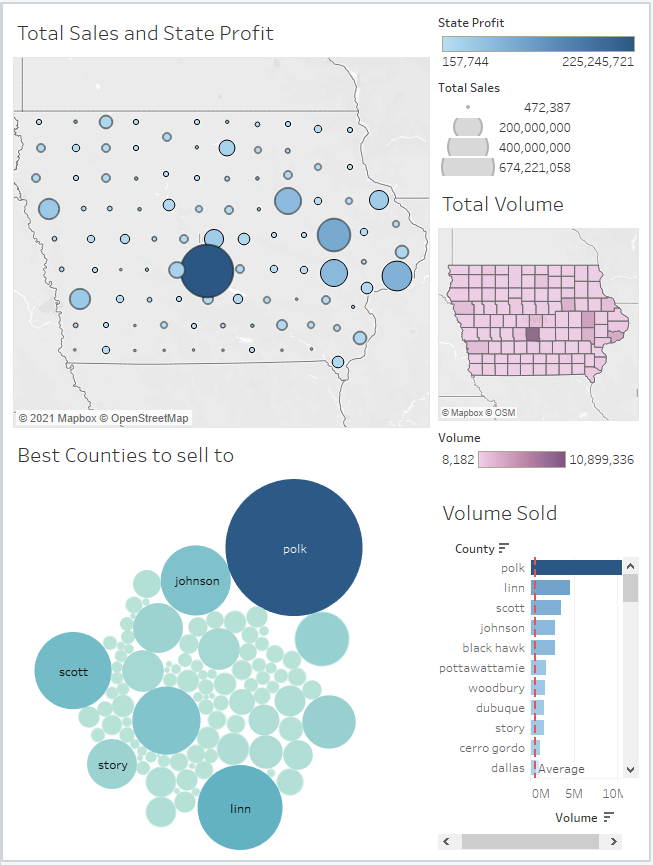

### Quarterly Evolution

In [117]:
grouper['str_Date'] = grouper['Date'].astype(str)
q_dates = grouper.str_Date.unique()

In [131]:
def plotquarter(date):
    data = grouper[grouper.Date == date]
    area = data.state_profit*1e-3
    color = data.state_profit*1e-6
    
    data.plot.scatter(x = 'Sale', y = 'Volume', s = area, c = color,
                     colormap = matplotlib.cm.get_cmap('cool'), linewidth = 1, edgecolors = 'k',
                      vmin = 0, vmax = 8, alpha = 0.6, sharex = False)
    plt.axis(xmax = 3e7, ymax = 400000)

In [132]:
interact(plotquarter, date = q_dates)

interactive(children=(Dropdown(description='date', options=('2012-03-31', '2012-06-30', '2012-09-30', '2012-12…

<function __main__.plotquarter(date)>

### Yearly Evolution

We will need to download the yearly average income per county since 2012. 

In [198]:
income = pd.read_csv('../data/raw/Annual_Personal_Income_for_State_of_Iowa_by_County_since2012.csv')
income.head(3)

,Row ID,Geography ID,Name,Variable Code,Variable,Value,Variable Unit,Date,Location
0,19001_2012_CAINC1-3_annual,19001,"Adair, IA",CAINC1-3,Per capita personal income,42093,Dollars,12/31/2012,POINT (-94.478164 41.328528)
1,19001_2013_CAINC1-3_annual,19001,"Adair, IA",CAINC1-3,Per capita personal income,44271,Dollars,12/31/2013,POINT (-94.478164 41.328528)
2,19001_2014_CAINC1-3_annual,19001,"Adair, IA",CAINC1-3,Per capita personal income,44864,Dollars,12/31/2014,POINT (-94.478164 41.328528)


In [199]:
income['County'] = income['Name'].str[:-4]
income['County'] = income['County'].str.lower()
income.head()

,Row ID,Geography ID,Name,Variable Code,Variable,Value,Variable Unit,Date,Location,County
0,19001_2012_CAINC1-3_annual,19001,"Adair, IA",CAINC1-3,Per capita personal income,42093,Dollars,12/31/2012,POINT (-94.478164 41.328528),adair
1,19001_2013_CAINC1-3_annual,19001,"Adair, IA",CAINC1-3,Per capita personal income,44271,Dollars,12/31/2013,POINT (-94.478164 41.328528),adair
2,19001_2014_CAINC1-3_annual,19001,"Adair, IA",CAINC1-3,Per capita personal income,44864,Dollars,12/31/2014,POINT (-94.478164 41.328528),adair
3,19001_2015_CAINC1-3_annual,19001,"Adair, IA",CAINC1-3,Per capita personal income,47700,Dollars,12/31/2015,POINT (-94.478164 41.328528),adair
4,19001_2016_CAINC1-3_annual,19001,"Adair, IA",CAINC1-3,Per capita personal income,47195,Dollars,12/31/2016,POINT (-94.478164 41.328528),adair


In [200]:
income = income[['Date', 'County', 'Value']]
income = income.set_index('Date')
income

,County,Value
Date,,
12/31/2012,adair,42093
12/31/2013,adair,44271
12/31/2014,adair,44864
12/31/2015,adair,47700
12/31/2016,adair,47195
...,...,...
12/31/2015,wright,52902
12/31/2016,wright,47750
12/31/2017,wright,49017


It seems we don't have data for 12/31/2020. for this We will use the data from 2019, and we will add/substract the mean difference between the State value for 2020 and that from 2019. Even more, we can use the data from this year to create the average income per capita for 2021.

This is what we found on Iowa.gov regarding per capita personal income:
- 62,035 at 03/31/2021
- 55,264 at 12/31/2020
- 52,229 at 12/31/2019

In [201]:
dif2020_2019 = 55264 - 52229
dif2021_2019 = 62035 - 52229

In [202]:
print('The average income in Iowa increased from 2019 to 2020 with ',dif2020_2019,'and from 2019 to Q1 of 2021 with', dif2021_2019)

The average income in Iowa increased from 2019 to 2020 with  3035 and from 2019 to Q1 of 2021 with 9806


In [203]:
counties = income['County'].unique()

In [204]:
income_2020 = income.loc['12/31/2019',:]
income_2020 = income_2020.set_index('County')
income_2020 += dif2020_2019
income_2020['Date'] = '12/31/2020'
income_2020

,Value,Date
County,,
adair,58286,12/31/2020
adams,69718,12/31/2020
allamakee,52980,12/31/2020
appanoose,43035,12/31/2020
audubon,61394,12/31/2020
...,...,...
winnebago,48828,12/31/2020
winneshiek,54939,12/31/2020
woodbury,48167,12/31/2020


In [205]:
income_2021 = income.loc['12/31/2019',:]
income_2021 = income_2021.set_index('County')
income_2021 += dif2021_2019
income_2021['Date'] = '12/31/2021'
income_2021

,Value,Date
County,,
adair,65057,12/31/2021
adams,76489,12/31/2021
allamakee,59751,12/31/2021
appanoose,49806,12/31/2021
audubon,68165,12/31/2021
...,...,...
winnebago,55599,12/31/2021
winneshiek,61710,12/31/2021
woodbury,54938,12/31/2021


In [206]:
income_2021 = income_2021.reset_index()
income_2021 = income_2021.set_index('Date')

income_2020 = income_2020.reset_index()
income_2020 = income_2020.set_index('Date')

In [207]:
income = income.append(income_2020)
income = income.append(income_2021)

income

,County,Value
Date,,
12/31/2012,adair,42093
12/31/2013,adair,44271
12/31/2014,adair,44864
12/31/2015,adair,47700
12/31/2016,adair,47195
...,...,...
12/31/2021,winnebago,55599
12/31/2021,winneshiek,61710
12/31/2021,woodbury,54938


In [209]:
income = income.reset_index()
income

,Date,County,Value
0,12/31/2012,adair,42093
1,12/31/2013,adair,44271
2,12/31/2014,adair,44864
3,12/31/2015,adair,47700
4,12/31/2016,adair,47195
...,...,...,...
985,12/31/2021,winnebago,55599
986,12/31/2021,winneshiek,61710
987,12/31/2021,woodbury,54938
988,12/31/2021,worth,54481


In [211]:
income.loc[:,'Date'] = income.loc[:,'Date'].apply(pd.to_datetime)

Now let's group the subset by years and merge the average income.

In [141]:
per_year_data = subset.groupby('County').resample('Y').sum()
per_year_data.reset_index()

,County,Date,Sale,Volume,state_profit
0,adair,2012-12-31,413691.48,8792.70,138977.05
1,adair,2013-12-31,378584.26,8229.74,127025.12
2,adair,2014-12-31,413071.07,8817.71,138332.90
3,adair,2015-12-31,424750.82,8969.34,142154.58
4,adair,2016-12-31,444516.75,9181.33,148066.75
...,...,...,...,...,...
985,wright,2017-12-31,761075.24,16208.98,254691.13
986,wright,2018-12-31,764098.98,15916.46,255105.54
987,wright,2019-12-31,792071.72,16177.16,264132.12
988,wright,2020-12-31,906035.74,17191.83,302328.34


In [221]:
per_year_data = per_year_data.merge(income, how = 'left', on = ['County', 'Date'])
per_year_data

,County,Date,Sale,Volume,state_profit,Value
0,adair,2012-12-31,413691.48,8792.70,138977.05,42093
1,adair,2013-12-31,378584.26,8229.74,127025.12,44271
2,adair,2014-12-31,413071.07,8817.71,138332.90,44864
3,adair,2015-12-31,424750.82,8969.34,142154.58,47700
4,adair,2016-12-31,444516.75,9181.33,148066.75,47195
...,...,...,...,...,...,...
985,wright,2017-12-31,761075.24,16208.98,254691.13,49017
986,wright,2018-12-31,764098.98,15916.46,255105.54,54438
987,wright,2019-12-31,792071.72,16177.16,264132.12,55258
988,wright,2020-12-31,906035.74,17191.83,302328.34,58293


In [222]:
per_year_data.count()

County          990
Date            990
Sale            990
Volume          990
state_profit    990
Value           990
dtype: int64

In [223]:
per_year_data.columns = ['County','Date','Sale','Volume','state_profit','Avg_income']

In [225]:
per_year_data['year'] = per_year_data['Date'].dt.year

In [228]:
per_year_data = per_year_data.drop('Date', axis = 1)

In [229]:
per_year_data

,County,Sale,Volume,state_profit,Avg_income,year
0,adair,413691.48,8792.70,138977.05,42093,2012
1,adair,378584.26,8229.74,127025.12,44271,2013
2,adair,413071.07,8817.71,138332.90,44864,2014
3,adair,424750.82,8969.34,142154.58,47700,2015
4,adair,444516.75,9181.33,148066.75,47195,2016
...,...,...,...,...,...,...
985,wright,761075.24,16208.98,254691.13,49017,2017
986,wright,764098.98,15916.46,255105.54,54438,2018
987,wright,792071.72,16177.16,264132.12,55258,2019
988,wright,906035.74,17191.83,302328.34,58293,2020


In [251]:
def plotyear(year):
    data = per_year_data[per_year_data['year'] == year]
    area = data.Volume*1e-3
    color = data.state_profit*1e-6
    
    data.plot.scatter(x = 'Avg_income', y = 'Sale', s = area, c = color,
                     colormap = matplotlib.cm.get_cmap('cool'), linewidth = 1, edgecolors = 'k',
                      vmin = 0, vmax = 8, alpha = 0.6, sharex = False)
    plt.axis(xmin = 20000, ymin = -1000, xmax = 80000, ymax = 1e8)

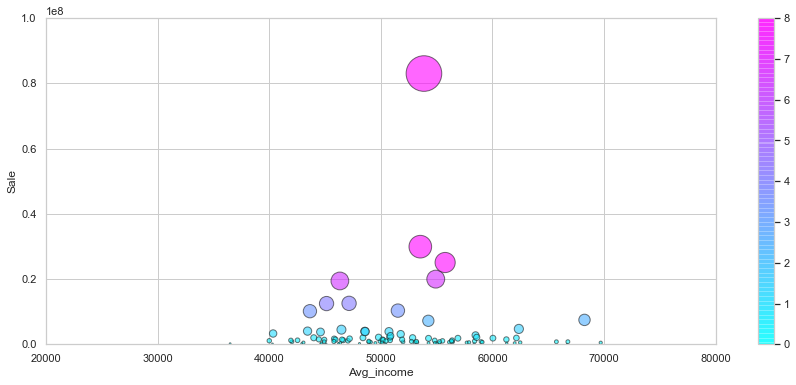

In [252]:
plotyear(2019)

In [253]:
interact(plotyear, year = widgets.IntSlider(min = 2012, max = 2021, step = 1, value = 2020))

interactive(children=(IntSlider(value=2020, description='year', max=2021, min=2012), Output()), _dom_classes=(…

<function __main__.plotyear(year)>

For one, we can observe an clear increase in teh average income per capita. With it, we can obserrve a similar increase in the liquor Sales and with it, in Volume sold and profit produced.

## Time Series

Finaly, let's explore these trends in a timeseries plots. This time we will mark the start of the COVID-19 Pandemic and we will have a closer look at the data starting with 2020.

In [266]:
df_ts = df[['Date','Sale (Dollars)']]
df_ts

,Date,Sale (Dollars)
1970-01-01 00:00:00.000000000,2016-03-24,243.00
1970-01-01 00:00:00.000000001,2016-03-24,156.12
1970-01-01 00:00:00.000000002,2016-03-24,477.60
1970-01-01 00:00:00.000000003,2016-03-17,450.00
1970-01-01 00:00:00.000000004,2016-03-24,79.56
...,...,...
1970-01-01 00:00:00.021641140,2017-11-17,346.56
1970-01-01 00:00:00.021641141,2018-05-23,157.50
1970-01-01 00:00:00.021641142,2018-07-26,246.72
1970-01-01 00:00:00.021641143,2020-10-15,1620.00


In [ ]:
df_ts = df_ts.groupby('Date').sum()
df_ts

In [ ]:
df_ts

In [ ]:
df_ts.plot()
plt.axvline(x='2013-01-01',linestyle = '--', color = 'r')
plt.axvline(x='2014-01-01',linestyle = '--', color = 'r')
plt.axvline(x='2015-01-01',linestyle = '--', color = 'r')
plt.axvline(x='2016-01-01',linestyle = '--', color = 'r')
plt.axvline(x='2017-01-01',linestyle = '--', color = 'r')
plt.axvline(x='2018-01-01',linestyle = '--', color = 'r')
plt.axvline(x='2019-01-01',linestyle = '--', color = 'r')
plt.axvline(x='2020-01-01',linestyle = '--', color = 'r')
plt.axvline(x='2021-01-01',linestyle = '--', color = 'r')